# Crypto API

In [1]:
 #Copied from API documentation. https://coinmarketcap.com/api/documentation/v1#section/Quick-Start-Guide

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dd061c7a-66ce-4074-937b-1e22532d1a63',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-08-31T16:18:56.090Z', 'error_code': 0, 'error_message': None, 'elapsed': 96, 'credit_count': 25, 'notice': None, 'total_count': 9323}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10438, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
#increate data_rate_limit 
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 


In [2]:
type(data)

dict

In [3]:
import pandas as pd

#allows to see all the columns
pd.set_option('display.max_columns', None)

In [4]:
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2023-08-31T16:18:56.090Z           0          None       96            25   

  notice  total_count  
0   None         9323

In [14]:
#normalize the data
df = pd.json_normalize(data['data'])

df ['timestamp'] = pd.to_datetime('now')
df

/var/folders/dp/9y872kks10d_3j3_9k946r_w0000gn/T/ipykernel_81355/4181773904.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df ['timestamp'] = pd.to_datetime('now')


id          name  symbol          slug  num_market_pairs  \
0         1       Bitcoin     BTC       bitcoin             10438   
1      1027      Ethereum     ETH      ethereum              7305   
2       825   Tether USDt    USDT        tether             61041   
3      1839           BNB     BNB           bnb              1596   
4        52           XRP     XRP           xrp              1058   
...     ...           ...     ...           ...               ...   
4995  20156  Bullshit Inu    BULL  bullshit-inu                11   
4996   4916         Modex   MODEX         modex                 7   
4997  19870        Winter  WINTER        winter                 3   
4998  24543    Perproject     PER    perproject                 4   
4999  18453      BetSwirl    BETS      betswirl                37   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2013-08-04T00:00:00.000Z   
...                        ...   
4995  2022-05-17T09:33:34.000Z   
4996  2019-11-26T00:00:00.000Z   
4997  2022-04-30T16:01:30.000Z   
4998  2023-04-19T09:41:44.000Z   
4999  2022-03-01T06:28:52.000Z   

                                                   tags          max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...      21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...                 NaN   
2     [payments, stablecoin, asset-backed-stablecoin...                 NaN   
3     [marketplace, centralized-exchange, payments, ...                 NaN   
4     [medium-of-exchange, enterprise-solutions, arr...  100000000000.00000   
...                                                 ...                 ...   
4995                                                 [] 1000000000000.00000   
4996                                                 []                 NaN   
4997                                                 []      33100000.00000   
4998                                                 []     599978994.00000   
4999                      [gambling, arbitrum-ecosytem]    7777777777.00000   

      circulating_supply      total_supply  infinite_supply  platform  \
0         19472518.00000          19472518            False       NaN   
1        120215701.19319   120215701.19319             True       NaN   
2      82859580798.55597 85439257711.57307             True       NaN   
3        153850424.93058   153850424.93058            False       NaN   
4      52977685768.00000       99988458761            False       NaN   
...                  ...               ...              ...       ...   
4995             0.00000     1000000000000            False       NaN   
4996             0.00000         266399993            False       NaN   
4997             0.00000           5636715            False       NaN   
4998             0.00000                 0            False       NaN   
4999             0.00000        7777777777            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                   146519996.00000            13479133.85548   
4997      4998                               NaN                       NaN   
4998      4999                   214815713.10000             5688541.85988   
4999      5000                  5262524718.87098             2754235.66316   

      tv

In [22]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    parameters = {
        'start':'1',
        'limit':'5000',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'dd061c7a-66ce-4074-937b-1e22532d1a63',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)




    df = pd.json_normalize(data['data'])
    df ['timestamp'] = pd.to_datetime('now')
    df
    #df= df.append(df2)
    
    if not os.path.isfile(r'/Users/annafall/Downloads/dirpython/API.csv'):
        df.to_csv(r'/Users/annafall/Downloads/dirpython/API.csv', header='Column_names')
    else:
        df.to_csv(r'/Users/annafall/Downloads/dirpython/API.csv',mode='a', header=False)


    


In [11]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

NameError: name 'api_runner' is not defined

In [25]:
pd.read_csv(r'/Users/annafall/Downloads/dirpython/API.csv')

Unnamed: 0     id           name   symbol           slug  \
0              0      1        Bitcoin      BTC        bitcoin   
1              1   1027       Ethereum      ETH       ethereum   
2              2    825    Tether USDt     USDT         tether   
3              3   1839            BNB      BNB            bnb   
4              4     52            XRP      XRP            xrp   
...          ...    ...            ...      ...            ...   
9995        4995  20809           Bone     BONE         bone-2   
9996        4996  15758  LimoCoin Swap  LMCSWAP  limocoin-swap   
9997        4997  25022        Pepe AI   PEPEAI        pepe-ai   
9998        4998  23043            Y2K      Y2K            y2k   
9999        4999  27703       Crypto X       CX       crypto-x   

      num_market_pairs                date_added  \
0                10437  2010-07-13T00:00:00.000Z   
1                 7304  2015-08-07T00:00:00.000Z   
2                60969  2015-02-25T00:00:00.000Z   
3                 1596  2017-07-25T00:00:00.000Z   
4                 1058  2013-08-04T00:00:00.000Z   
...                ...                       ...   
9995                 7  2022-06-28T14:21:32.000Z   
9996                11  2021-12-07T23:14:29.000Z   
9997                 6  2023-05-07T01:07:46.000Z   
9998                13  2022-12-21T11:06:37.000Z   
9999                 2  2023-07-28T07:52:03.000Z   

                                                   tags    max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2     ['payments', 'stablecoin', 'asset-backed-stabl...           NaN   
3     ['marketplace', 'centralized-exchange', 'payme...           NaN   
4     ['medium-of-exchange', 'enterprise-solutions',...  1.000000e+11   
...                                                 ...           ...   
9995                                                 []  1.000000e+07   
9996                                                 []  1.650000e+09   
9997                                          ['memes']  4.206900e+14   
9998                              ['arbitrum-ecosytem']           NaN   
9999                                          ['memes']  1.000000e+12   

      circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0           1.947231e+07  1.947231e+07            False       NaN         1   
1           1.202157e+08  1.202157e+08             True       NaN         2   
2           8.285958e+10  8.543926e+10             True       NaN         3   
3           1.538505e+08  1.538505e+08            False       NaN         4   
4           5.297769e+10  9.998846e+10            False       NaN         5   
...                  ...           ...              ...       ...       ...   
9995        0.000000e+00  1.000000e+07            False       NaN      4996   
9996        0.000000e+00  1.650000e+09            False       NaN      4997   
9997        0.000000e+00  4.206900e+14            False       NaN      4998   
9998        0.000000e+00  2.000000e+07            False       NaN      4999   
9999        0.000000e+00  1.000000e+12            False       NaN      5000   

      self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                                  NaN                       NaN        NaN   
1                                  NaN                       NaN        NaN   
2                                  NaN                       NaN        NaN   
3                                  NaN                       NaN        NaN   
4                                  NaN                       NaN        NaN   
...                                ...                       ...        ...   
9995                               NaN                       NaN        NaN   
9996                      1.650000e+09              1.655305e+06        NaN   
9997                      4.206900e+14             

In [26]:
# Data transformation

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [16]:
df

id          name  symbol          slug  num_market_pairs  \
0         1       Bitcoin     BTC       bitcoin             10438   
1      1027      Ethereum     ETH      ethereum              7305   
2       825   Tether USDt    USDT        tether             61041   
3      1839           BNB     BNB           bnb              1596   
4        52           XRP     XRP           xrp              1058   
...     ...           ...     ...           ...               ...   
4995  20156  Bullshit Inu    BULL  bullshit-inu                11   
4996   4916         Modex   MODEX         modex                 7   
4997  19870        Winter  WINTER        winter                 3   
4998  24543    Perproject     PER    perproject                 4   
4999  18453      BetSwirl    BETS      betswirl                37   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2013-08-04T00:00:00.000Z   
...                        ...   
4995  2022-05-17T09:33:34.000Z   
4996  2019-11-26T00:00:00.000Z   
4997  2022-04-30T16:01:30.000Z   
4998  2023-04-19T09:41:44.000Z   
4999  2022-03-01T06:28:52.000Z   

                                                   tags          max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...      21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...                 NaN   
2     [payments, stablecoin, asset-backed-stablecoin...                 NaN   
3     [marketplace, centralized-exchange, payments, ...                 NaN   
4     [medium-of-exchange, enterprise-solutions, arr...  100000000000.00000   
...                                                 ...                 ...   
4995                                                 [] 1000000000000.00000   
4996                                                 []                 NaN   
4997                                                 []      33100000.00000   
4998                                                 []     599978994.00000   
4999                      [gambling, arbitrum-ecosytem]    7777777777.00000   

      circulating_supply      total_supply  infinite_supply  platform  \
0         19472518.00000          19472518            False       NaN   
1        120215701.19319   120215701.19319             True       NaN   
2      82859580798.55597 85439257711.57307             True       NaN   
3        153850424.93058   153850424.93058            False       NaN   
4      52977685768.00000       99988458761            False       NaN   
...                  ...               ...              ...       ...   
4995             0.00000     1000000000000            False       NaN   
4996             0.00000         266399993            False       NaN   
4997             0.00000           5636715            False       NaN   
4998             0.00000                 0            False       NaN   
4999             0.00000        7777777777            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                   146519996.00000            13479133.85548   
4997      4998                               NaN                       NaN   
4998      4999                   214815713.10000             5688541.85988   
4999      5000                  5262524718.87098             2754235.66316   

      tv

In [17]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                          -1.26371                      -1.20748   
Ethereum                         -1.16575                      -0.99683   
Tether USDt                       0.01385                       0.01979   
BNB                              -0.80643                      -0.65522   
XRP                              -0.82513                      -1.23974   
...                                   ...                           ...   
Bullshit Inu                     -0.01545                       0.65031   
Modex                           -19.76471                       3.85329   
Winter                           -0.55228                      -0.84785   
Perproject                       -0.52658                      -0.84851   
BetSwirl                         -0.14584                       0.84051   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           2.83184                      -7.46708   
Ethereum                          2.08389                      -8.26698   
Tether USDt                       0.05909                       0.04517   
BNB                               1.84839                      -9.67341   
XRP                               0.24913                     -25.46168   
...                                   ...                           ...   
Bullshit Inu                      7.27807                      -5.70540   
Modex                           322.93324                     471.45023   
Winter                            3.15917                     -14.08468   
Perproject                       -9.20214                     -24.28100   
BetSwirl                         -1.16333                    9193.19571   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                          -12.22039                      -0.87627  
Ethereum                         -12.25862                     -10.90496  
Tether USDt                       -0.00801                      -0.02921  
BNB                              -10.05575                     -27.70240  
XRP                                6.54927                      -0.01982  
...                                    ...                           ...  
Bullshit Inu                     -20.40372                     -31.38857  
Modex                            484.33930                     471.55235  
Winter                           -34.49978                     -50.03641  
Perproject                       -32.66791                     -41.65630  
BetSwirl                           1.53921                     -30.37298  

[4977 rows x 6 columns]

In [18]:
df4=df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      -1.26371
          quote.USD.percent_change_24h     -1.20748
          quote.USD.percent_change_7d       2.83184
          quote.USD.percent_change_30d     -7.46708
          quote.USD.percent_change_60d    -12.22039
                                            ...    
BetSwirl  quote.USD.percent_change_24h      0.84051
          quote.USD.percent_change_7d      -1.16333
          quote.USD.percent_change_30d   9193.19571
          quote.USD.percent_change_60d      1.53921
          quote.USD.percent_change_90d    -30.37298
Length: 29862, dtype: float64

In [19]:
type(df4)

pandas.core.series.Series

In [21]:
df5=df4.to_frame(name='values')
df5

values
name                                            
Bitcoin  quote.USD.percent_change_1h    -1.26371
         quote.USD.percent_change_24h   -1.20748
         quote.USD.percent_change_7d     2.83184
         quote.USD.percent_change_30d   -7.46708
         quote.USD.percent_change_60d  -12.22039
...                                          ...
BetSwirl quote.USD.percent_change_24h    0.84051
         quote.USD.percent_change_7d    -1.16333
         quote.USD.percent_change_30d 9193.19571
         quote.USD.percent_change_60d    1.53921
         quote.USD.percent_change_90d  -30.37298

[29862 rows x 1 columns]

In [22]:
df5.count()

values    29862
dtype: int64

In [28]:
index = pd.Index(range (90)) #29880

#df6 = df5.set_index(index)
df6 = df5.reset_index()

df6

name                       level_1     values
0       Bitcoin   quote.USD.percent_change_1h   -1.26371
1       Bitcoin  quote.USD.percent_change_24h   -1.20748
2       Bitcoin   quote.USD.percent_change_7d    2.83184
3       Bitcoin  quote.USD.percent_change_30d   -7.46708
4       Bitcoin  quote.USD.percent_change_60d  -12.22039
...         ...                           ...        ...
29857  BetSwirl  quote.USD.percent_change_24h    0.84051
29858  BetSwirl   quote.USD.percent_change_7d   -1.16333
29859  BetSwirl  quote.USD.percent_change_30d 9193.19571
29860  BetSwirl  quote.USD.percent_change_60d    1.53921
29861  BetSwirl  quote.USD.percent_change_90d  -30.37298

[29862 rows x 3 columns]

In [29]:
# rename the column
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

name                percent_change     values
0       Bitcoin   quote.USD.percent_change_1h   -1.26371
1       Bitcoin  quote.USD.percent_change_24h   -1.20748
2       Bitcoin   quote.USD.percent_change_7d    2.83184
3       Bitcoin  quote.USD.percent_change_30d   -7.46708
4       Bitcoin  quote.USD.percent_change_60d  -12.22039
...         ...                           ...        ...
29857  BetSwirl  quote.USD.percent_change_24h    0.84051
29858  BetSwirl   quote.USD.percent_change_7d   -1.16333
29859  BetSwirl  quote.USD.percent_change_30d 9193.19571
29860  BetSwirl  quote.USD.percent_change_60d    1.53921
29861  BetSwirl  quote.USD.percent_change_90d  -30.37298

[29862 rows x 3 columns]

In [48]:
df7['percent_change'].replace(['quote.USD.percent_change_1h', '1h'])

0         quote.USD.percent_change_1h
1        quote.USD.percent_change_24h
2         quote.USD.percent_change_7d
3        quote.USD.percent_change_30d
4        quote.USD.percent_change_60d
                     ...             
29857    quote.USD.percent_change_24h
29858     quote.USD.percent_change_7d
29859    quote.USD.percent_change_30d
29860    quote.USD.percent_change_60d
29861    quote.USD.percent_change_90d
Name: percent_change, Length: 29862, dtype: object

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

KeyboardInterrupt: 

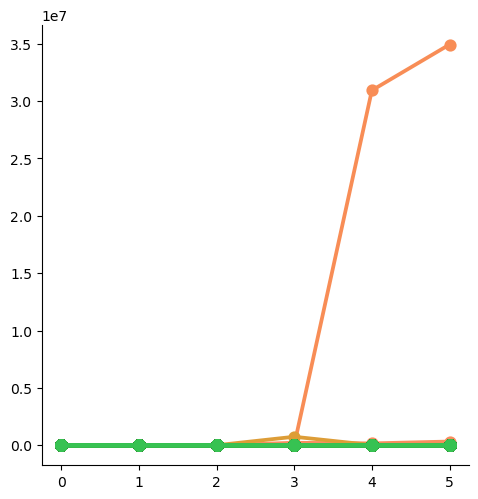

In [33]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [45]:
df

id          name  symbol          slug  num_market_pairs  \
0         1       Bitcoin     BTC       bitcoin             10438   
1      1027      Ethereum     ETH      ethereum              7305   
2       825   Tether USDt    USDT        tether             61041   
3      1839           BNB     BNB           bnb              1596   
4        52           XRP     XRP           xrp              1058   
...     ...           ...     ...           ...               ...   
4995  20156  Bullshit Inu    BULL  bullshit-inu                11   
4996   4916         Modex   MODEX         modex                 7   
4997  19870        Winter  WINTER        winter                 3   
4998  24543    Perproject     PER    perproject                 4   
4999  18453      BetSwirl    BETS      betswirl                37   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2013-08-04T00:00:00.000Z   
...                        ...   
4995  2022-05-17T09:33:34.000Z   
4996  2019-11-26T00:00:00.000Z   
4997  2022-04-30T16:01:30.000Z   
4998  2023-04-19T09:41:44.000Z   
4999  2022-03-01T06:28:52.000Z   

                                                   tags          max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...      21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...                 NaN   
2     [payments, stablecoin, asset-backed-stablecoin...                 NaN   
3     [marketplace, centralized-exchange, payments, ...                 NaN   
4     [medium-of-exchange, enterprise-solutions, arr...  100000000000.00000   
...                                                 ...                 ...   
4995                                                 [] 1000000000000.00000   
4996                                                 []                 NaN   
4997                                                 []      33100000.00000   
4998                                                 []     599978994.00000   
4999                      [gambling, arbitrum-ecosytem]    7777777777.00000   

      circulating_supply      total_supply  infinite_supply  platform  \
0         19472518.00000          19472518            False       NaN   
1        120215701.19319   120215701.19319             True       NaN   
2      82859580798.55597 85439257711.57307             True       NaN   
3        153850424.93058   153850424.93058            False       NaN   
4      52977685768.00000       99988458761            False       NaN   
...                  ...               ...              ...       ...   
4995             0.00000     1000000000000            False       NaN   
4996             0.00000         266399993            False       NaN   
4997             0.00000           5636715            False       NaN   
4998             0.00000                 0            False       NaN   
4999             0.00000        7777777777            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                   146519996.00000            13479133.85548   
4997      4998                               NaN                       NaN   
4998      4999                   214815713.10000             5688541.85988   
4999      5000                  5262524718.87098             2754235.66316   

      tv

In [49]:
df10= df7[['name','percent_change', 'values']]
df10.query("name == 'Bitcoin'")


name                percent_change    values
0  Bitcoin   quote.USD.percent_change_1h  -1.26371
1  Bitcoin  quote.USD.percent_change_24h  -1.20748
2  Bitcoin   quote.USD.percent_change_7d   2.83184
3  Bitcoin  quote.USD.percent_change_30d  -7.46708
4  Bitcoin  quote.USD.percent_change_60d -12.22039
5  Bitcoin  quote.USD.percent_change_90d  -0.87627

<Axes: xlabel='percent_change', ylabel='values'>

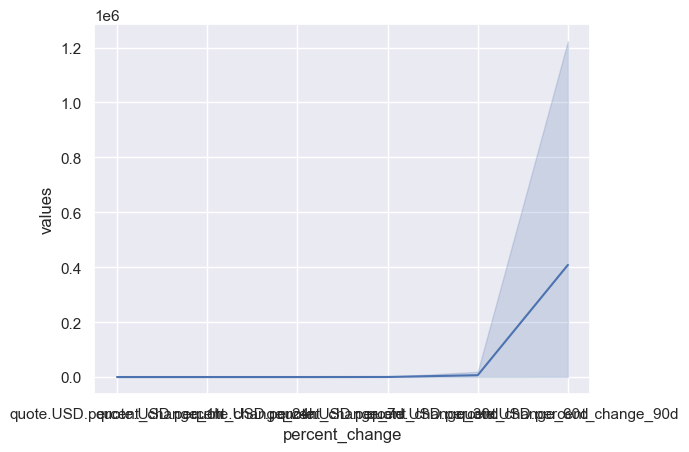

In [52]:
sns.set_theme(style="darkgrid")
sns.lineplot(x ='percent_change', y='values', data=df10)